In [ ]:
import os

directory_path = "../data/f-f-100k-mini"
number_of_elements = len(os.listdir(directory_path))
print(f"Number of elements in the directory: {number_of_elements}")

Number of elements in the directory: 99988


In [3]:
import pandas as pd

num_samples = 100
tot_rows = 0
for file in os.listdir(directory_path)[:num_samples]:
    df = pd.read_parquet(os.path.join(directory_path, file))
    tot_rows += df.shape[0]
print(f"Total rows: {tot_rows}")
print(f"Average rows: {tot_rows / num_samples}")

Total rows: 15011
Average rows: 150.11


In [4]:
# Load a game
filepath = directory_path + '/' + os.listdir(directory_path)[0]
print(filepath)
df = pd.read_parquet(filepath)

# Check dimensions
print(df.shape)

../data/f-f-100k-mini/bfcfb08d-b5b6-4c87-bdc4-494bcf9e3df9.parquet
(237, 3964)


In [11]:
all_cols = list(df.columns)
for col in all_cols:
    print(col)

F_BANK_BRICK
F_BANK_DEV_CARDS
F_BANK_ORE
F_BANK_SHEEP
F_BANK_WHEAT
F_BANK_WOOD
F_EDGE(0, 1)_P0_ROAD
F_EDGE(0, 1)_P1_ROAD
F_EDGE(0, 20)_P0_ROAD
F_EDGE(0, 20)_P1_ROAD
F_EDGE(0, 5)_P0_ROAD
F_EDGE(0, 5)_P1_ROAD
F_EDGE(1, 2)_P0_ROAD
F_EDGE(1, 2)_P1_ROAD
F_EDGE(1, 6)_P0_ROAD
F_EDGE(1, 6)_P1_ROAD
F_EDGE(10, 11)_P0_ROAD
F_EDGE(10, 11)_P1_ROAD
F_EDGE(11, 12)_P0_ROAD
F_EDGE(11, 12)_P1_ROAD
F_EDGE(12, 13)_P0_ROAD
F_EDGE(12, 13)_P1_ROAD
F_EDGE(13, 14)_P0_ROAD
F_EDGE(13, 14)_P1_ROAD
F_EDGE(14, 15)_P0_ROAD
F_EDGE(14, 15)_P1_ROAD
F_EDGE(15, 17)_P0_ROAD
F_EDGE(15, 17)_P1_ROAD
F_EDGE(16, 18)_P0_ROAD
F_EDGE(16, 18)_P1_ROAD
F_EDGE(16, 21)_P0_ROAD
F_EDGE(16, 21)_P1_ROAD
F_EDGE(17, 18)_P0_ROAD
F_EDGE(17, 18)_P1_ROAD
F_EDGE(19, 20)_P0_ROAD
F_EDGE(19, 20)_P1_ROAD
F_EDGE(19, 21)_P0_ROAD
F_EDGE(19, 21)_P1_ROAD
F_EDGE(2, 3)_P0_ROAD
F_EDGE(2, 3)_P1_ROAD
F_EDGE(2, 9)_P0_ROAD
F_EDGE(2, 9)_P1_ROAD
F_EDGE(20, 22)_P0_ROAD
F_EDGE(20, 22)_P1_ROAD
F_EDGE(22, 23)_P0_ROAD
F_EDGE(22, 23)_P1_ROAD
F_EDGE(3, 12)_P0_ROAD
F_EDG

In [ ]:
from catanrl.features.catanatron_utils import is_non_graph_feature_parquet

feature_cols = [col for col in all_cols if is_non_graph_feature_parquet(col)]
board_tensor_cols = [col for col in all_cols if col.startswith('BT_')]
print(len(feature_cols) + len(board_tensor_cols))
for col in feature_cols:
    print(col)
for col in board_tensor_cols:
    print(col)

3744
F_BANK_BRICK
F_BANK_DEV_CARDS
F_BANK_ORE
F_BANK_SHEEP
F_BANK_WHEAT
F_BANK_WOOD
F_IS_DISCARDING
F_IS_MOVING_ROBBER
F_P0_ACTUAL_VPS
F_P0_BRICK_IN_HAND
F_P0_CITIES_LEFT
F_P0_HAS_ARMY
F_P0_HAS_PLAYED_DEVELOPMENT_CARD_IN_TURN
F_P0_HAS_ROAD
F_P0_HAS_ROLLED
F_P0_KNIGHT_IN_HAND
F_P0_KNIGHT_PLAYED
F_P0_LONGEST_ROAD_LENGTH
F_P0_MONOPOLY_IN_HAND
F_P0_MONOPOLY_PLAYED
F_P0_NUM_DEVS_IN_HAND
F_P0_NUM_RESOURCES_IN_HAND
F_P0_ORE_IN_HAND
F_P0_PUBLIC_VPS
F_P0_ROADS_LEFT
F_P0_ROAD_BUILDING_IN_HAND
F_P0_ROAD_BUILDING_PLAYED
F_P0_SETTLEMENTS_LEFT
F_P0_SHEEP_IN_HAND
F_P0_VICTORY_POINT_IN_HAND
F_P0_WHEAT_IN_HAND
F_P0_WOOD_IN_HAND
F_P0_YEAR_OF_PLENTY_IN_HAND
F_P0_YEAR_OF_PLENTY_PLAYED
F_P1_CITIES_LEFT
F_P1_HAS_ARMY
F_P1_HAS_ROAD
F_P1_HAS_ROLLED
F_P1_KNIGHT_PLAYED
F_P1_LONGEST_ROAD_LENGTH
F_P1_MONOPOLY_PLAYED
F_P1_NUM_DEVS_IN_HAND
F_P1_NUM_RESOURCES_IN_HAND
F_P1_PUBLIC_VPS
F_P1_ROADS_LEFT
F_P1_ROAD_BUILDING_PLAYED
F_P1_SETTLEMENTS_LEFT
F_P1_YEAR_OF_PLENTY_PLAYED
BT_0
BT_1
BT_2
BT_3
BT_4
BT_5
BT_6
BT_7
BT_8

In [ ]:
from catanatron.gym.envs.catanatron_env import ACTIONS_ARRAY, ACTION_SPACE_SIZE
import collections

print(f'Action space size: {ACTION_SPACE_SIZE}')
print(f'Total actions in array: {len(ACTIONS_ARRAY)}')

counts = collections.Counter([(action[0].name if hasattr(action[0], 'name') else action[0]) for action in ACTIONS_ARRAY])
print('\nAction counts by type:')
for action_type, count in sorted(counts.items()):
    print(f'  {action_type}: {count}')

Action space size: 290
Total actions in array: 290

Action counts by type:
  BUILD_CITY: 54
  BUILD_ROAD: 72
  BUILD_SETTLEMENT: 54
  BUY_DEVELOPMENT_CARD: 1
  DISCARD: 1
  END_TURN: 1
  MARITIME_TRADE: 60
  MOVE_ROBBER: 19
  PLAY_KNIGHT_CARD: 1
  PLAY_MONOPOLY: 5
  PLAY_ROAD_BUILDING: 1
  PLAY_YEAR_OF_PLENTY: 20
  ROLL: 1


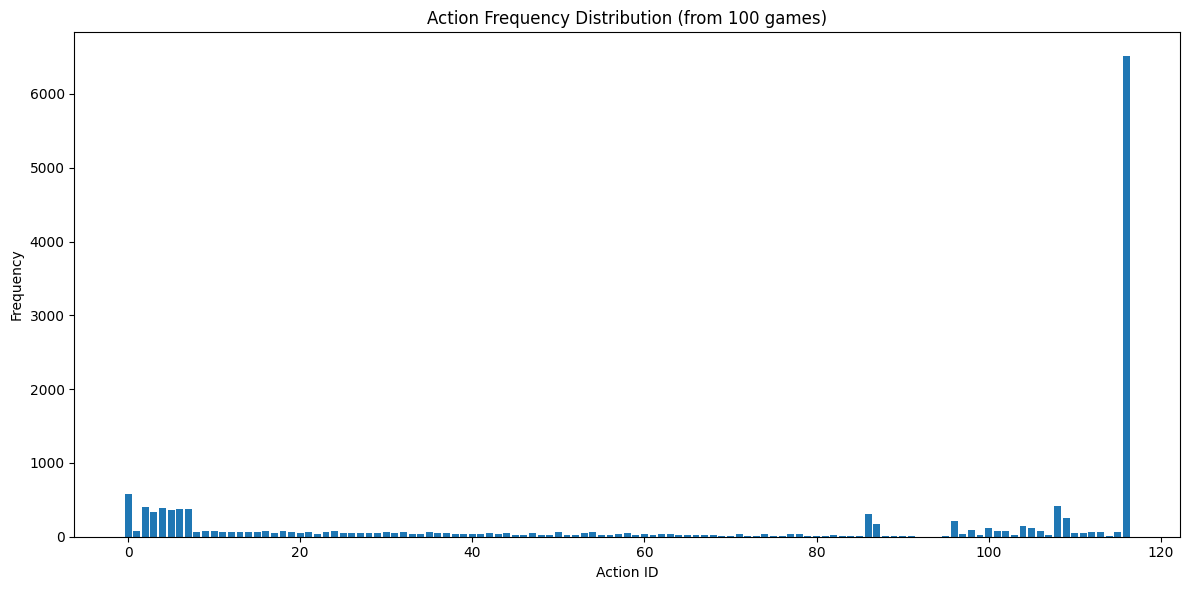

Total actions: 15011
Unique actions: 117

Top 10 most frequent actions:
289    6509
0       578
241     415
2       407
4       390
6       377
7       373
5       357
3       331
201     304
Name: count, dtype: int64


In [19]:
import matplotlib.pyplot as plt

# Collect all actions from n samples
num_samples = 100
all_actions = []

for file in os.listdir(directory_path)[:num_samples]:
    df = pd.read_parquet(os.path.join(directory_path, file))
    all_actions.extend(df['ACTION'].tolist())

# Count frequency of each action
action_counts = pd.Series(all_actions).value_counts().sort_index()

# Create histogram
plt.figure(figsize=(12, 6))
plt.bar(range(len(action_counts)), action_counts.values)
plt.xlabel('Action ID')
plt.ylabel('Frequency')
plt.title(f'Action Frequency Distribution (from {num_samples} games)')
plt.tight_layout()
plt.show()

print(f'Total actions: {len(all_actions)}')
print(f'Unique actions: {len(action_counts)}')
print(f'\nTop 10 most frequent actions:')
print(action_counts.sort_values(ascending=False).head(10))

In [23]:
played_keys = [key for key in action_counts.keys() if action_counts[key] != 0]
print(len(played_keys))

117


In [27]:
from catanatron.gym.envs.catanatron_env import from_action_space, ACTIONS_ARRAY

for idx, count in action_counts.sort_values(ascending=False).items():
    print(f'{ACTIONS_ARRAY[idx][0].name}: {count}')


END_TURN: 6509
ROLL: 578
MARITIME_TRADE: 415
MOVE_ROBBER: 407
MOVE_ROBBER: 390
MOVE_ROBBER: 377
MOVE_ROBBER: 373
MOVE_ROBBER: 357
MOVE_ROBBER: 331
BUY_DEVELOPMENT_CARD: 304
MARITIME_TRADE: 258
MARITIME_TRADE: 208
PLAY_KNIGHT_CARD: 168
MARITIME_TRADE: 147
MARITIME_TRADE: 113
MARITIME_TRADE: 112
MARITIME_TRADE: 89
BUILD_ROAD: 80
MARITIME_TRADE: 80
MOVE_ROBBER: 78
BUILD_ROAD: 76
MARITIME_TRADE: 76
BUILD_ROAD: 75
MARITIME_TRADE: 74
BUILD_ROAD: 73
BUILD_ROAD: 72
BUILD_ROAD: 69
BUILD_ROAD: 68
BUILD_ROAD: 66
BUILD_ROAD: 65
BUILD_ROAD: 65
BUILD_ROAD: 64
MARITIME_TRADE: 63
BUILD_ROAD: 63
BUILD_ROAD: 62
BUILD_ROAD: 61
BUILD_ROAD: 61
MARITIME_TRADE: 60
MARITIME_TRADE: 60
BUILD_ROAD: 58
BUILD_ROAD: 58
BUILD_SETTLEMENT: 58
BUILD_SETTLEMENT: 58
BUILD_ROAD: 57
BUILD_ROAD: 56
BUILD_ROAD: 56
BUILD_ROAD: 55
BUILD_ROAD: 54
BUILD_SETTLEMENT: 54
BUILD_ROAD: 53
BUILD_ROAD: 53
BUILD_ROAD: 52
BUILD_ROAD: 52
BUILD_SETTLEMENT: 51
BUILD_SETTLEMENT: 50
BUILD_SETTLEMENT: 50
MARITIME_TRADE: 50
MARITIME_TRADE: 48
BU

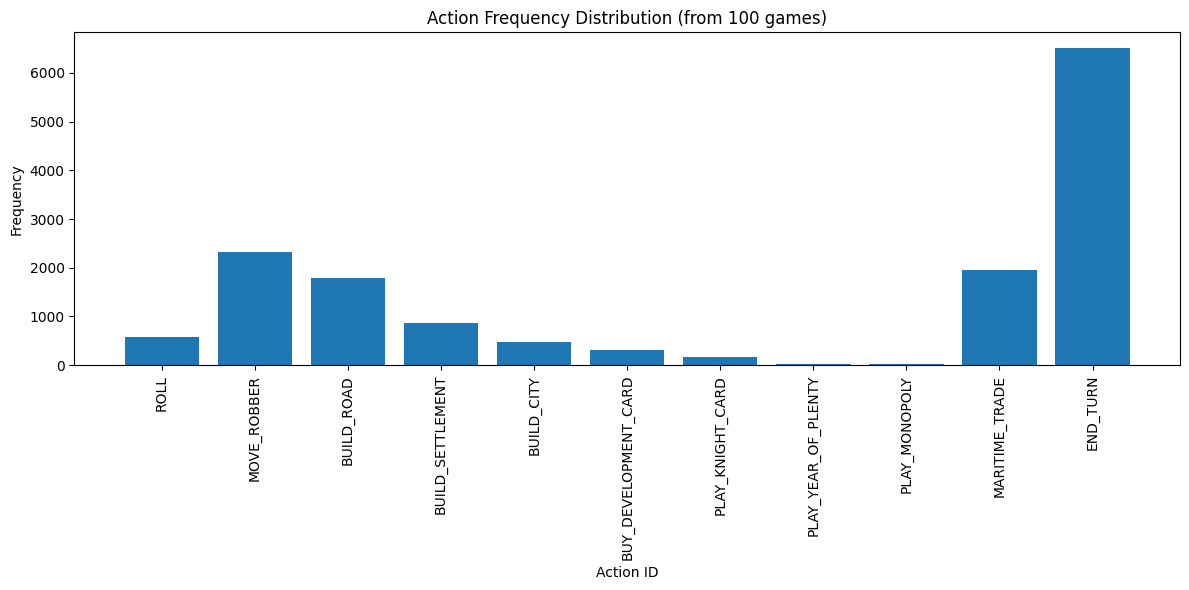

END_TURN: 6509
MOVE_ROBBER: 2313
MARITIME_TRADE: 1962
BUILD_ROAD: 1789
BUILD_SETTLEMENT: 869
ROLL: 578
BUILD_CITY: 475
BUY_DEVELOPMENT_CARD: 304
PLAY_KNIGHT_CARD: 168
PLAY_MONOPOLY: 23
PLAY_YEAR_OF_PLENTY: 21


In [31]:
from collections import defaultdict

general_action_counts = defaultdict(int)

for idx, count in action_counts.items():
    general_action_counts[ACTIONS_ARRAY[idx][0].name] += count

# Create histogram
plt.figure(figsize=(12, 6))
plt.bar(general_action_counts.keys(), general_action_counts.values())
plt.xticks(rotation='vertical') 
plt.xlabel('Action ID')
plt.ylabel('Frequency')
plt.title(f'Action Frequency Distribution (from {num_samples} games)')
plt.tight_layout()
plt.show()

for action, count in sorted(general_action_counts.items(), key=lambda x: x[1], reverse=True):
    print(f'{action}: {count}')